Source : https://www.kaggle.com/code/arunkumarramanan/tensorflow-tutorial-and-housing-price-prediction/notebook

Membuat dan melatih Fully connected NN untuk melakukan memprediksi harga rumah berdasarkan dataset Boston housing dataset yang disediakan Keras. Boston housing dataset terdiri dari 13 fitur 506 data. Output dari prediksi adalah suatu nilai kontinu.

### 1. Load/Import Library yang diperlukan

In [373]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [374]:
# Commonly used modules
import numpy as np
import os
import sys

In [375]:
# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

### 2. Load data dari Keras

In [376]:
#load data
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

### 3. Eksplorasi data

In [377]:
# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

### 4. Buat model neural network 
Pada tahapan ini ditentukan jumlah layer, jumlah hidden unit pada tiap layer, dan fungsi aktivasi pada tiap layer

In [387]:
def build_model():
    model = keras.Sequential([
        Dense(100, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
        Dense(100, activation=tf.nn.relu),
        Dense(100, activation=tf.nn.relu),
        #Dense(200, activation=tf.nn.relu),
        #Dense(50, activation=tf.nn.relu),
        Dense(20, activation=tf.nn.relu),
        Dense(1)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

In [379]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

### 5. Latih model

In [380]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [381]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [382]:
#hist

In [383]:
# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


Final Root Mean Square Error on validation set: 3.008


### 6. Visualisasi hasil pelatihan dan validasi

In [384]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

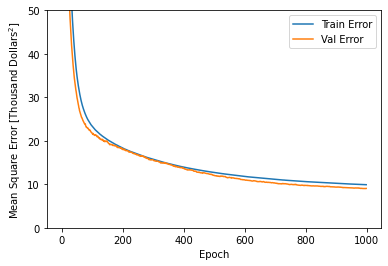

In [385]:
plot_history()

### 7. Evaluasi hasil prediksi terhadap data test
Mencoba memprediksi data yang yang belum pernah dilihat menggunakan model yang sudah dilatih sebelumnya.

In [390]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 4ms/step - loss: 23.2424 - mae: 3.1914 - mse: 23.2424
Root Mean Square Error on test set: 4.821
